# CIS 545 Recitation 1: Intro to Python and Pandas

**Zoom Link**: https://upenn.zoom.us/j/99680731376


**Date**: 09/01 (Fri) @ 1:45 PM

**Recitation TAs**: Arnav Jhaveri & Jeffrey Li


**Recitation Overview:**
1. Colab Tips
2. Python basics: Syntax, For Loops, List Comprehension
3. Pandas basics: Series & DataFrames, Apply

# 💡 Colab Tips

### Integration with Drive

Colaboratory is integrated with Google Drive. It allows you to share, comment, and collaborate on the same document with multiple people:

* The **SHARE** button (top-right of the toolbar) allows you to share the notebook and control permissions set on it just like Google docs, slides, sheets, etc. This will be useful for the term/final project.

* **File → Make a Copy** creates a copy of the notebook in Drive. Do it for homeworks always! Make sure the file name becomes `Copy_of_{...}.ipynb`
> This is very important for starting homeworks!

* **File → Save** saves the File to Drive. **File->Save and checkpoint** pins the version so it doesn't get deleted from the revision history.

* **File → Revision history** shows the notebook's revision history.

Final tip: this important to save time reviewing code during OH!

* **Tools → Settings → Editor → Show line numbers** shows line numbers in code blocks.

### Working with Python in Colab
Colaboratory is built on top of [Jupyter Notebook](https://jupyter.org/). Below are some examples of convenience functions provided.

Long running python processes can be interrupted:
`Runtime → Restart runtime → You should see a green  tick at the top right`
* Generally useful for when the dataset stops loading (eg. local copy already exists) or when your code runs forever.
* Sometimes Jupyter/Colab memory gets really weird...and just needs to be reset
* Make sure to reinitialize PennGrader after you do this (and run any cells that create intermediate df's because you won't have them anymore!)

In [1]:
import time
print("Sleeping")
time.sleep(5) # sleep for a while; interrupt me!
print("Done Sleeping")

Sleeping
Done Sleeping


### PennGrader
```
%%capture
!pip3 install penngrader
from penngrader.grader import *
```
```
# PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO`
# TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 19104444 # YOUR PENN-ID GOES HERE AS AN INTEGER #
```
```
grader = PennGrader(homework_id = 'CIS545_Fall_2020_HW1', student_id = STUDENT_ID)
```

### Tab-Completion and Exploring Code

Colab provides tab completion (or command, if you're on a Mac - this applies to all future uses of 'tab') to explore attributes of Python objects, as well as to quickly view documentation strings. As an example, first run the following cell to import the  [`numpy`](http://www.numpy.org) module.

In [2]:
import numpy as np

If you now insert your cursor after ``np.random.`` and press **Tab**, you will see the list of available completions within the ``np.random`` submodule.

In [3]:
np.random

<module 'numpy.random' from '/usr/local/lib/python3.10/dist-packages/numpy/random/__init__.py'>

If you type an open parenthesis followed by the **Tab** key after any function or class in the module, you will see a pop-up of its documentation string:

In [4]:
np.random.rand()

0.9876977220315146

To open the documentation in a persistent pane at the bottom of your screen, add a **?** after the object or method name and execute the cell using **Shift+Enter**:

In [8]:
np.random

### Exceptions

Exceptions are formatted nicely in Colab outputs:

In [26]:
x = 1
y = 4
# z = y/(1-x)

### Rich, Interactive Outputs
Until now all of the generated outputs have been text, but they can be more interesting, like the chart below.

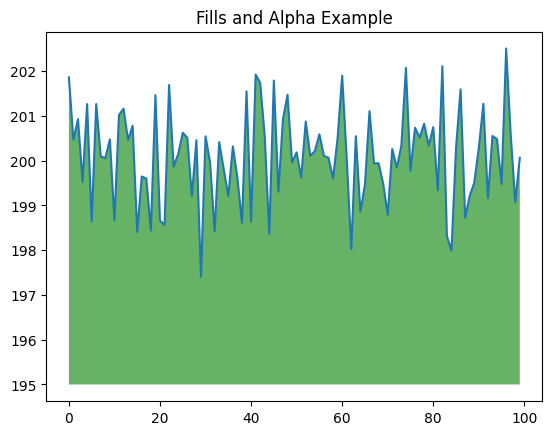

In [9]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Fills and Alpha Example")
plt.show()

### Submission
`Files → Download .ipynb & .py → Rename → Submit through Gradescope` \
**!! DO NOT run autograder cells after the deadline !!** -- your work will be marked as late if you do this!

# 🐍 Python
Python is a programming language that is very popular among the data science, machine learning community.
It is a higher-level programming language than Java, and has an extensive collection of libraries that can be easily installed.
**We require that you use python for this class, so it is important to be familiar with it.**

### Python vs Java
- Java is compiled, but Python is not: you directly run the Python file
- Java is **statically-typed** (the types of the variables cannot change), whereas Python is **dynamically-typed** (you do not declare types in Python).
```
# This works in python
x = 3
x = "python"
```
- Python does not use curly braces like Java. Instead, it uses whitespace (tabs/spaces) to infer the scope of methods, for loops, etc.
```
for i in range(10):
      print(i * 2)      # Indent by 4 spaces
      print(i * 4)
      for j in range(4):
          print(i * j)  # Indent 8 spaces
print('Done')       # No indent, runs after for loop
```
- Boolean values are now `True` and `False`




### String Manipulation

How does index work?

<img src = 'https://drive.google.com/uc?id=1QeD_AAJpXkJA7ZrRN3SKsvAquVl_m_D2'>

In [10]:
s = "ABCdef"
s = 'ABCdef'

# Length
print(len(s))  # 6

# Standard Indexing: Notice hard brackets and 0-indexing
print(s[0])      # 'A'
print(s[1])      # 'B'
print(s[5])      # 'f'
# print(s[100])  # Error

# Range Indexing
print(s[1:4])    # 'BCd'
print(s[2:])     # 'Cdef'
print(s[:2])     # 'AB'
print(s[1:100])  # 'BCdef'

# Negative Indexing
print(s[-1])    # 'f'
print(s[-2])    # 'e'
print(s[:-1])   # 'ABCde'
print(s[:-3])   # 'ABC'
print(s[::-1])  # 'fedCBA'

# Concatenation
print(s + 'xyz')     # 'ABCdefxyz'
# print(s + 123)     # Error
print(s + str(123))  # 'ABCdef123'

# Splitting
print(s.split('C'))  # ['AB', 'def']
print("  hi  ".strip())

6
A
B
f
BCd
Cdef
AB
BCdef
f
e
ABCde
ABC
fedCBA
ABCdefxyz
ABCdef123
['AB', 'def']
hi


# ✅ Knowledge Check #1

Index/slicing:

Given s = “BIG DATA”, what’s the result of doing s[1:-2:2]?


A. “BIG DATA”

B. “I A”

C. “BGDT”

D. “I AT”


## If Statements

In [11]:
# Python doesn't require parentheses
a, b = 7, 10

# equality
if a == 7:
    print('yes')
else:
    print('no')

# not equal
if a != 8:
    print('neq')

# and &&
if a > 5 and b <= 10:
    print('1')
elif a > 10:
    print('2')
else:
    print('3')

# or
if a < 10 or b > 100:
    print('yes')

# Strings also use '=='
s = 'abc'
if s == 'abc':
    print('here')


t = 'cabcd'
if s in t:
    print("hi")

yes
neq
1
yes
here
hi


## For Loops

In [12]:
# a is a list
a = [0, 8, 3, 5, 1]

range(5)     # Dynamically generates 0, 1, 2, 3, 4
range(1, 5)  # 1, 2, 3, 4 (notice upperbound is not inclusive)

# "Standard" for loop from Java
# loop through using index
print("Standard loop using index")
for i in range(len(a)):
    print(a[i])

# Iterate over each element in the list
# loop through each item
print("Iterate over each element in the list")
for x in a:
    print(x)

# Loop over items in an array and get the index at the same time
print("Iterate over each element in the list and get index of each element")
for index, item in enumerate(a):
  print(index, item)

# Iterating through dictionaries
print("Iterating through dictionaries")
# d is a dictionary, which is a key-value pair
d = {0: 'a', 1: 'b', 2: 'c'}
for key, value in d.items():
    print(str(key) + ' -> ' + value)


Standard loop using index
0
8
3
5
1
Iterate over each element in the list
0
8
3
5
1
Iterate over each element in the list and get index of each element
0 0
1 8
2 3
3 5
4 1
Iterating through dictionaries
0 -> a
1 -> b
2 -> c


# ✅ Knowledge Check #2

For loops:

Which one of the following yields different results?

In [18]:
lst = [1, 2, 3]

# A.
for i in range(0,len(lst)):
  print(lst[i])

# B.
for i in range(len(lst)):
	print(lst[i])

# C.
for x in lst:
	print(x)

# D.
for i, x in enumerate(lst):
	print(i)


1
2
3
1
2
3
1
2
3
0
1
2


## Lists

In [19]:
a = [0, 4, 2, 8, 9]  # Create a list with initial items
b = []  # Create an empty list

# Length
print(len(a))  # 5

# The same indexing operations on strings work for lists
print(a[1])    # 4
print(a[2:4])  # [2, 8]
print(a[-2])   # 8

# Sort the list
print(sorted(a))                # [0, 2, 4, 8, 9] Creates a copy, does not modify the original list
print(sorted(a, reverse=True))  # [9, 8, 4, 2, 0] Also a copy

# Add items to the end of the list (one item at a time)
a.append(10)  # Returns nothing
print(a)      # [0, 4, 2, 8, 9, 10]
a += [1, 12]  # Returns nothing
print(a)      # [0, 4, 2, 8, 9, 10, 1, 12]

# Lists don't have to be the same type in python
a.append('machine learning')  # Returns nothing
print(a)                      # [0, 4, 2, 8, 9, 10, 1, 12, 'machine learning']
a.append([20,30])             # Returns nothing, appending an item of list to a list
print(a)                      # [0, 4, 2, 8, 9, 10, 1, 12, 'machine learning',[20,30]]

# adding multiple item to a list
a.extend([40,50])  # Returns nothing, appending a list to a list
print(a)           # [0, 4, 2, 8, 9, 10, 1, 12, 'machine learning',[20,30], 40, 50]

#print(sorted(a))  # Causes an error as we now have a mix of int and str

# Searching
print(8 in a)    # True
print(100 in a)  # False
print(a.index(8))

5
4
[2, 8]
8
[0, 2, 4, 8, 9]
[9, 8, 4, 2, 0]
[0, 4, 2, 8, 9, 10]
[0, 4, 2, 8, 9, 10, 1, 12]
[0, 4, 2, 8, 9, 10, 1, 12, 'machine learning']
[0, 4, 2, 8, 9, 10, 1, 12, 'machine learning', [20, 30]]
[0, 4, 2, 8, 9, 10, 1, 12, 'machine learning', [20, 30], 40, 50]
True
False
3


## List Comprehension
A cool and extremely useful feature of Python! Good for condensing code using loops and conditionals.

The general syntax is:

```
[ <expression> for <name> in <list> if <filter> ]
```

List comprehension also applies to dictionaries and sets, as follows.

```
{ <expression> for <key>, <value> in <dict> if <filter> }
```

Loop vs. List Comprehension

<img src = 'https://drive.google.com/uc?id=1nrkmOe2K_0IiLA1z1cWNx-H1BULrluMc'>

In [20]:
# Sometimes code can be simplified using list/dictionary comprehensions
def add_one(x):
  return x + 1

# The standard way to apply a function to every element and save in y
x = [0, 1, 2, 3]
y = []

for x_i in x:
  y.append(add_one(x_i))

# the above loop can also be written as below by looping through using index
for i in range(len(x)):
  y.append(add_one(x[i]))

# List comprehension: this is equivalent to the above standard loop
y = [add_one(x_i) for x_i in x] # funtion to element for element in data structure
print(y)

# Add conditionals
y2 = []
for x_i in x:
  if x_i > 1:
    y2.append(add_one(x_i))
y2 = [add_one(x_i) for x_i in x if x_i > 1]
# function to element for element in data structure if element meets conditional

# Dictionary comprehensions can be used to create dictionaries easily.
# This creates a mapping from x_i -> x_i * 4
d = {x_i : x_i * 4 for x_i in x}
# element key : function to element value for element in data structure
print(d)
print(d[2])  # 8

[1, 2, 3, 4]
{0: 0, 1: 4, 2: 8, 3: 12}
8


# ✅ Knowledge Check #3

List Comprehension:

What does the last command print?



In [25]:
lst = [ (x, y) for x in range (0, 3) for y in [4, 5, 6] if x < 2 ]
print(len(lst))

# A. 1

# B. 3

# C. 6

# D. 9

6


### TODO #1


In [23]:
# this is Carol's credit card spendings for August

daily_spendings = [[0, 30, 35, 31, 15, 60, 82],
                   [22, 3, 40, 19, 1020, 55, 36],
                   [578, 21, 965, 9, 680, 60, 82],
                   [0, 75000, 5, 99, 13, 101, 8]]

# Though late, she realizes that her identity has been stolen!
# Get a list of all the exorbitant daily spendings (defined to be > 100): i.e. [1020, 578, 965, 680, 75000, 101]

In [58]:
##### EXERCISE #####

# step 1: define a helper function to take in a list and return a list of exorbitant spendings
# hint: try using LIST COMPREHENSION to loop through the list

def get_filtered(x):
  return [x_i for x_i in x if x_i > 100]

# step 2: use a FOR LOOP to loop through each week's spending and return a single list of exorbitant spendings
# hint: think about what methods to use to obtain a single list of spendings

result = []
for x in daily_spendings:
  result = [x_i for x_i in get_filtered(x)]

result

[75000, 101]

# Python & Libraries

Before moving onto Pandas, let's take a look at the relationship between core Python and libraries.

The methods we have just covered are part of the core Python functionalities (loops, basic data structures, basic arithmetic operations).

Python does provide some basic libraries which users can `import` upon request. (eg math, os, random, etc).

Then, there are also myriads third-party libraries which users can `install` (download) and `import` to perform certain tasks (eg. Pandas for data analysis, matplotlib for visualizations).

If you are running Python for the first time on your local machine, you may need to run `pip install` on the third-party libraries.

Google Colab has already `installed` some of the commonly used packages (such as Pandas, Numpy, Matplotlib), so we do not need to run pip install every time we restart runtime. However, you still need to `import` them!

<img src = 'https://drive.google.com/uc?id=18IEGTtHQM1HUPHiws3wpA8P08zxRT0It'>



# Pandas 🐼

Documentation is your best friend: https://pandas.pydata.org/docs/

More on reading documentation next time!

In [32]:
import pandas as pd
import numpy as np

## Series and DataFrames

* **Series:** one-dimensional array with hashable axis labels. Parameter is an iterable array-like object, such as lists, dicts, etc.
* **DataFrame:** two-dimensional, size-mutable tabular data, consisting of columns of Series. Parameter is an array-like object or DataFrame.

In [33]:
sports = pd.Series(['football', 'basketball',' volleyball','tennis'])

population = pd.Series({'Germany': 81.3, 'Belgium': 11.3, 'France': 64.3,
                        'United Kingdom': 64.9, 'Netherlands': 16.9})

countries = pd.DataFrame({'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']})

In [34]:
sports

0       football
1     basketball
2     volleyball
3         tennis
dtype: object

In [35]:
type(sports)

pandas.core.series.Series

In [36]:
population

Germany           81.3
Belgium           11.3
France            64.3
United Kingdom    64.9
Netherlands       16.9
dtype: float64

In [37]:
type(population)

pandas.core.series.Series

In [38]:
population.index

Index(['Germany', 'Belgium', 'France', 'United Kingdom', 'Netherlands'], dtype='object')

In [39]:
population.values

array([81.3, 11.3, 64.3, 64.9, 16.9])

In [40]:
population / 100

Germany           0.813
Belgium           0.113
France            0.643
United Kingdom    0.649
Netherlands       0.169
dtype: float64

To access dataframe variables, use the `.` operator or brackets `[ ]`, or access multiple columns with `[[ ]]`

In [41]:
population['Netherlands']

16.9

In [42]:
population.Netherlands

16.9

In [43]:
countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


In [44]:
type(countries)

pandas.core.frame.DataFrame

In [45]:
type(countries.area)

pandas.core.series.Series

In [46]:
countries['area']

0     30510
1    671308
2    357050
3     41526
4    244820
Name: area, dtype: int64

### TODO #2

In [ ]:
# What's the difference if we use the double braces, i.e.:
# Explore and see! :)

##### EXERCISE #####


We can also access dataframes using conditional operators, such as:

In [ ]:
countries.capital == 'London'

In [ ]:
# Extract data for UK/London
countries[countries.capital == 'London']

In [ ]:
# We can also do this without the .
countries[countries['capital'] == 'London']

### TODO #3

In [ ]:
# Now use inequalities: get all countries with area > 100k!

##### EXERCISE #####


# ✅ Knowledge Check #4

Series and DataFrames:

Which of the following results in a series?



In [ ]:
# A.
df[df['city'] == 'Boston']

# B.
df[df['country'] == 'Germany']['population'] / 100

# C.
df[['age']].applymap(lambda x: ageGroup(x))

## Creating New Columns
Adding columns to the DataFrame!

In [ ]:
# basic assignment
countries['newVar'] = [1,2,3,None,None]
countries

In [ ]:
# using existing columns for assignment
# here, we are creating a COMPOSITE VARIABLE defined as:
# "2 * population + sqrt(area)" for each row in countries
countries['newVar'] = countries.population * 2  + countries.area**0.5
countries

## Apply

Apply is a very powerful method which can be used for making major data manipulation tasks. Much faster than standard for loops because of internal optimizations.

NOTE: In some assignments, your code could never finish running if you use for loops due to the size of the datasets!

In [ ]:
%%timeit

countries = pd.DataFrame({'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']})

for index, row in countries.iterrows():
  row['capital'].upper()

With the same data set, let's try updating column ```capital``` using ```apply```.

In [ ]:
 %%timeit

countries = pd.DataFrame({'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']})

countries['capital'] = countries['capital'].apply(lambda x : x.upper())
countries


Apply to a dataframe

<img src = 'https://drive.google.com/uc?id=15yFJR7MEMLZdl_GGV-gH6NzgumQ7YfWR'>


Apply to a single column

<img src = 'https://drive.google.com/uc?id=1BH1mHUNCscEelzn9dFvv386AXrszxwwD'>


Let's practice with a simple dataframe ```df``` which contains a single ```Age``` column.

In [ ]:
df = pd.DataFrame({'Age': [1, 2, 19, 39, 50]})
df

In [ ]:
## APPLY to dataframe
# add 10 to all ages less than 50

df['NewAge_simple'] = df.apply(lambda x: x['Age'] + 10 if x['Age'] < 50 else x['Age'], axis=1)

# the code above can also be written as ...

def addTen(num):
	return num + 10
df['NewAge_function'] = df.apply(lambda x: addTen(x['Age']) if x['Age'] < 50 else x['Age'], axis=1)

## APPLY to column
# the code above can also be written as ...
df['NewAge_simple_col'] = df['Age'].apply(lambda x: x + 10 if x < 50 else x)

# the code above can also be written as ...
df['NewAge_function_col'] = df['Age'].apply(lambda x: addTen(x) if x < 50 else x)

df

# ✅ Knowledge Check #5

Apply:

Which of the following is incorrect?


In [ ]:
# A.
df['Adult'] = df.apply(lambda x: True if x['Age'] >= 18 else False, axis=1)

# B.
df['Adult'] = df['Age'].apply(lambda x: True if x >= 18 else False)

# C.
df['Adult'] = df['Age'].apply(lambda x: True if x >= 18 else False, axis=1)

### TODO #4

In [ ]:
# Let's call ageBucket on every element in Age, and set that as a new column!

def ageBucket(x):
    if x<18:
        return "A. <18"
    elif x<25:
        return "B. 18-25"
    elif x<45:
        return "C. 25-45"
    else:
        return "D. >45"

##### EXERCISE #####



In [ ]:
df['AgeBucket2'] = df.apply(lambda x : ageBucket(x['Age']),axis=1)
df.head()

In [ ]:
df.applymap(lambda x: str(x) + "--")

Other derivative methods that you can look into are `map` and `applymap`.
* `map` works only on Series but has the same functionality as `apply`.
* `applymap` works only on dfs and applies to every element excluding the target column.

# Preview for next time

More on Pandas, including ...
- Merge (Join)
- Handling Null Values
- Group By

We attribute our work to https://developers.google.com/edu/ as well as previous TA's Andrew Cui, Carol Li and Celine Lee.